In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Angle=0
Velocity=0
Gravity_Acc=9.81 #gravity accleration
DataX=[]
DataY=[]
Pairs=np.array([(0,0),(0,0)])
Barrier=[50,100,50]
Landing_Zone=[150,175,0]

Definice čar, které později nakreslí barieru

In [3]:
Line1X=np.full(Barrier[2],Barrier[0])
Line1Y=np.arange(0,Barrier[2],1)
Line2X=np.arange(Barrier[0],Barrier[1],1)
Line2Y=np.full(Barrier[1]-Barrier[0],Barrier[2])
Line3X=np.full(Barrier[2],Barrier[1])
Line3Y=np.arange(0,Barrier[2],1)

Tři vnořené for-loopy. V prvním měním Velocity, v druhém Angle a ve třetím Time. V tomto třetím for-loopu se počítá trajektorie pro danou kombinaci Velocity a Angle a zároveň se uvěřuje, jestli trajektorie naráží do Bariery a nebo dopadá do Landing Zone. Podle toho se nastavují proměnné BarrierCheck a LandingCheck, které se v závěru vyhodnocují. Vyhovují-li podmínkám (trajektorie neprochází Barrierou a dopadá do Landing Zone) tak se kombinace Velocity a Anglu (jmenuje se Pair) uloží do pole všech vyhovující párů a celá trajektoriem se přidá do listu DataX resp. DataY pro vytisknutí.

In [4]:
for Velocity in np.arange(10,200,1):    
    for Angle in np.arange(5,80,5):
        VelocityX=Velocity*math.cos(math.radians(Angle))
        VelocityY=Velocity*math.sin(math.radians(Angle))
        BarrierCheck=False
        LandingCheck=False
        TmpX=[]
        TmpY=[]
        for Time in np.arange(0,50,0.1):
            x=VelocityX*Time
            y=VelocityY*Time-0.5*Gravity_Acc*Time*Time
           # Barrier criterium
            if ((x > Barrier[0] and y < Barrier[2]) and (x < Barrier[1] and y < Barrier[2])):
                BarrierCheck=True
                break
            # Landing Zone criterium    
            if ((x > Landing_Zone[0] and y < 0) and (x < Landing_Zone[1] and y < 0)):
                LandingCheck=True
                break
            # Bellow y axis criterium
            if y < 0:
                break   
            TmpX.append(x)
            TmpY.append(y)

        # Conditions: do not hit the Barrier and hit the Landing Zone
        if not BarrierCheck:
            if LandingCheck:
                Pairs=np.append(Pairs,[[Velocity,Angle]],axis=0)
                DataX=DataX+TmpX
                DataY=DataY+TmpY

In [5]:
print(Pairs)

[[ 0  0]
 [ 0  0]
 [41 55]
 [42 55]
 [42 60]
 [43 60]
 [44 60]
 [44 65]
 [45 65]
 [46 65]
 [47 65]
 [48 70]
 [49 70]
 [50 70]
 [51 70]
 [55 75]
 [56 75]
 [57 75]
 [58 75]]


<function matplotlib.pyplot.show(*args, **kw)>

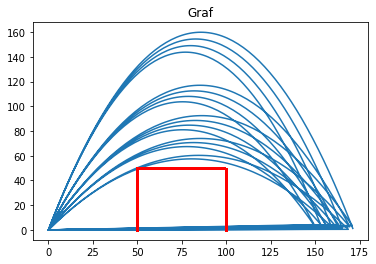

In [6]:
plt.title('Graf')
plt.plot(DataX, DataY)
plt.plot(Line1X,Line1Y,color='red',linewidth=3)
plt.plot(Line2X,Line2Y,color='red',linewidth=3)
plt.plot(Line3X,Line3Y,color='red',linewidth=3)
plt.show